# Embedded Questions - Modal clauseType

In this Notebook, I look at the breakdown of verbs in each kind of questions to understand better the semantic content of different types of questions.

For each wh-question type, I look first at emb_verb, the code for the first verb in the question, then v2_after, and then mat_verb. 

In [126]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import re

In [127]:
df = pd.read_json("final_corpus.json")

In [128]:
len(df)

427079

In [129]:
# # Remove the Brown corpus
df = df[df.corpus != "brown"]

In [130]:
len(df) #422983

422983

In [131]:
df['emb_verb'] = df['emb_verb'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})
df['v1_after'] = df['v1_after'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})

In [132]:
emb = df[df.questType == "Embeded Question"]

In [133]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [134]:
mod = emb[emb.clauseType == "Modal"]

In [135]:
len(mod)/len(emb)*100

11.949435522340595

In [ ]:
mod['v1_after'].value_counts()

In [12]:
mod.pivot_table(index=['wh', 'emb_verb'], values='sentence', aggfunc=len).groupby(['wh']).sentence.transform(lambda x: x/sum(x))

wh     emb_verb
how    can         0.344886
       could       0.164773
       may         0.033523
       might       0.051136
       must        0.030682
       shall       0.006250
       should      0.061932
       will        0.111648
       would       0.195170
where  can         0.267054
       could       0.146589
       may         0.047896
       might       0.059507
       must        0.029028
       shall       0.013062
       should      0.097242
       will        0.145138
       would       0.194485
who    can         0.150000
       could       0.113333
       may         0.040000
       might       0.113333
       must        0.013333
       shall       0.013333
       should      0.083333
       will        0.233333
       would       0.240000
Name: sentence, dtype: float64

In [136]:
mod_who = mod.loc[mod.wh.isin(["who"])]
mod_where = mod.loc[mod.wh.isin(["where"])]
mod_how = mod.loc[mod.wh.isin(["how"])]

# C1. Modal-How

In [137]:
m_how_vs_count = mod_how.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index()

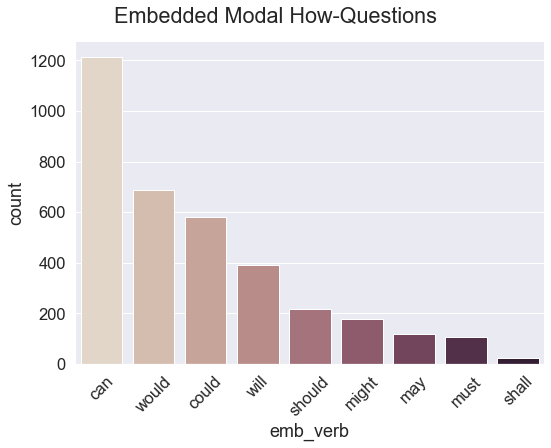

In [29]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=m_how_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Embedded Modal How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# v2_after

In [138]:
# mirst filter so its not a super long list. We want to see the most mrequent ones.
m_how_v2s = mod_how.groupby('v2_after').filter(lambda x: len(x) >= 75)
m_how_vs_v2_count = m_how_v2s.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
# then look at the counts mor those most mrequent verbs
m_how_v2s.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
can       be          397
          do          28 
          get         37 
          have        19 
could     be          153
          do          22 
          get         24 
          have        57 
may       be          56 
          have        12 
might     be          63 
          do          2  
          have        19 
must      be          32 
          do          1  
          have        30 
shall     be          3  
          do          1  
          get         1  
          have        1  
should    be          107
          do          2  
          get         3  
          have        11 
will      be          110
          do          6  
          get         4  
          have        10 
would     be          179
          do          18 
          get         16 
          have        75 
Name: v2_after, dtype: int64

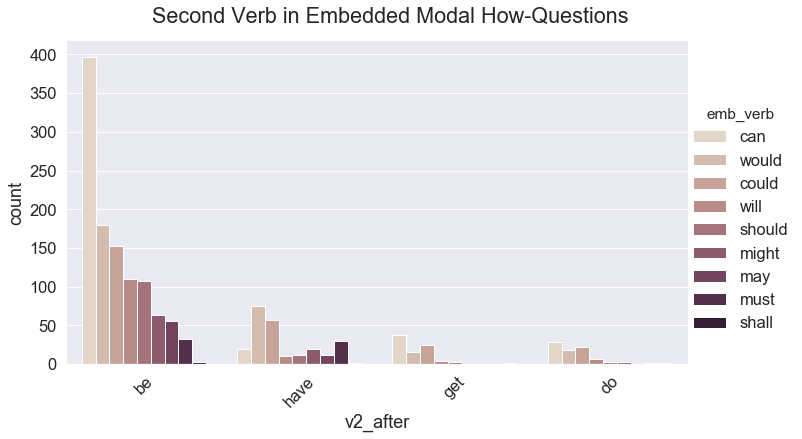

In [52]:
sns.set(font_scale=1.5)
g = sns.catplot(x="v2_after", y="count",hue="emb_verb", kind="bar", data=m_how_vs_v2_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Embedded Modal How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# mat_verb

In [139]:
m_how_vs_mv = mod_how.groupby('mat_verb').filter(lambda x: len(x) >= 100)
m_how_vs_mv_count = m_how_vs_mv.groupby(["mat_verb","emb_verb"])["mat_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)
m_how_vs_mv.groupby(['emb_verb','mat_verb'])['mat_verb'].count()

emb_verb  mat_verb
can       be          89 
          know        128
          see         178
          show        146
          think       16 
          wonder      20 
could     be          28 
          know        60 
          see         80 
          show        32 
          think       16 
          wonder      56 
may       be          5  
          know        9  
          see         7  
          show        16 
          think       1  
          wonder      1  
might     be          7  
          know        11 
          see         13 
          show        10 
          think       12 
          wonder      7  
must      be          8  
          know        30 
          see         3  
          show        2  
          think       9  
          wonder      7  
shall     be          2  
          know        5  
          see         1  
should    be          26 
          know        11 
          see         7  
          show        10 
          think    

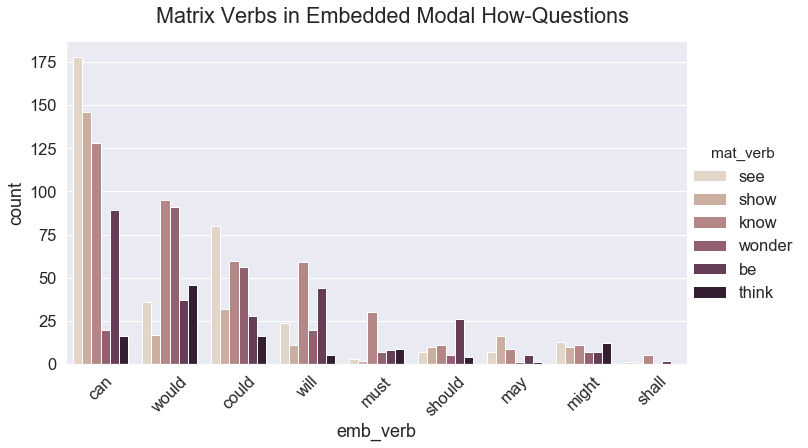

In [103]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", hue="mat_verb", kind="bar", data=m_how_vs_mv_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Matrix Verbs in Embedded Modal How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [144]:
m_how_vs_mv.loc[m_how_vs_mv.emb_verb == "shall"].sentence

37560     I don't know how I shall manage to look at the screen.’                                                                                                       
167491    I do not know how I shall manage this winter and dread it not for the weather which is rarely fierce, but for the loneliness.                                 
193547    Erm, so it is, how shall I put it, erm, unfortunate I think, in, in Shropshire's view, that they didn't continue along the distribution on the previous basis.
256046    I don't know how long I shall be laid up with this wretched ankle.                                                                                            
269014    I don't know how we shall get them out, because they are exhausted and probably they will find it difficult to walk.                                          
281978    Today discussion centres upon how much autonomy is appropriate and how, when and where it shall be applied.                                      

# C1. Modal-Where

In [145]:
m_where_vs_count = mod_where.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index()

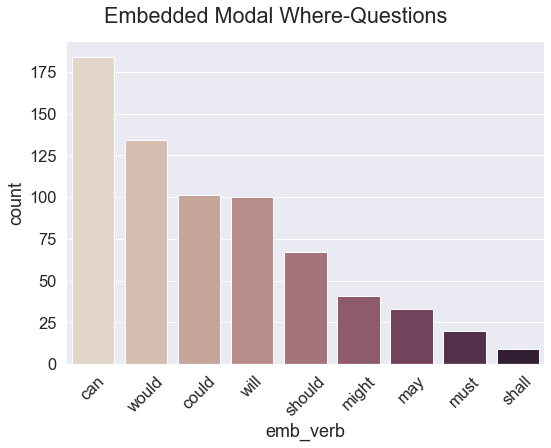

In [28]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=m_where_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Embedded Modal Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# v2_after

In [146]:
# mirst filter so its not a super long list. We want to see the most mrequent ones.
m_where_v2s = mod_where.groupby('v2_after').filter(lambda x: len(x) >= 20)
m_where_vs_v2_count = m_where_v2s.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
# then look at the counts mor those most mrequent verbs
m_where_v2s.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
can       be          45
          find        10
          get         13
          go          8 
          have        3 
could     be          21
          find        5 
          get         6 
          go          1 
          have        11
may       be          9 
          have        5 
might     be          11
          find        6 
          get         1 
          go          2 
          have        4 
must      be          4 
          go          2 
          have        3 
shall     be          1 
          go          4 
should    be          32
          go          6 
          have        7 
will      be          27
          find        4 
          get         2 
          go          9 
would     be          28
          find        1 
          get         3 
          go          14
          have        16
Name: v2_after, dtype: int64

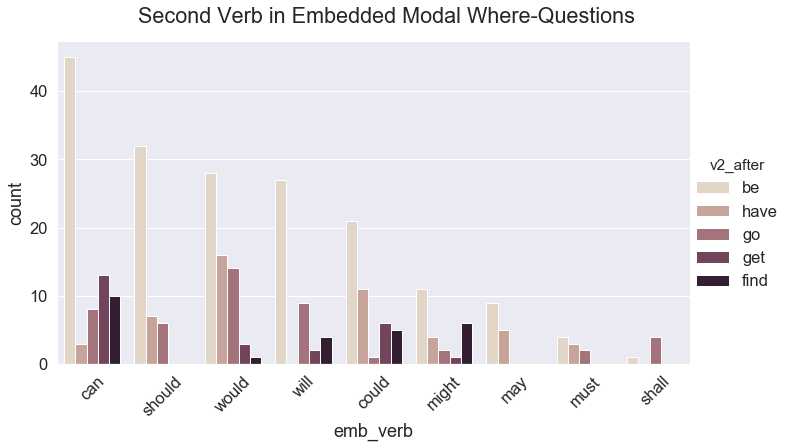

In [149]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=m_where_vs_v2_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Embedded Modal Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# mat_verb

In [147]:
m_where_vs_mv = mod_where.groupby('mat_verb').filter(lambda x: len(x) >= 15)
m_where_vs_mv_count = m_where_vs_mv.groupby(["emb_verb","mat_verb"])["mat_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)
m_where_vs_mv.groupby(['emb_verb','mat_verb'])['mat_verb'].count()

emb_verb  mat_verb
can       's          15
          be          41
          go          11
          know        30
could     's          3 
          be          25
          go          2 
          know        14
may       be          12
          know        2 
might     's          3 
          be          5 
          go          1 
          know        5 
must      's          4 
          be          8 
          go          1 
          know        1 
shall     be          2 
          go          1 
should    's          12
          be          19
          go          2 
          know        6 
will      's          5 
          be          22
          go          4 
          know        13
would     's          10
          be          27
          go          2 
          know        21
Name: mat_verb, dtype: int64

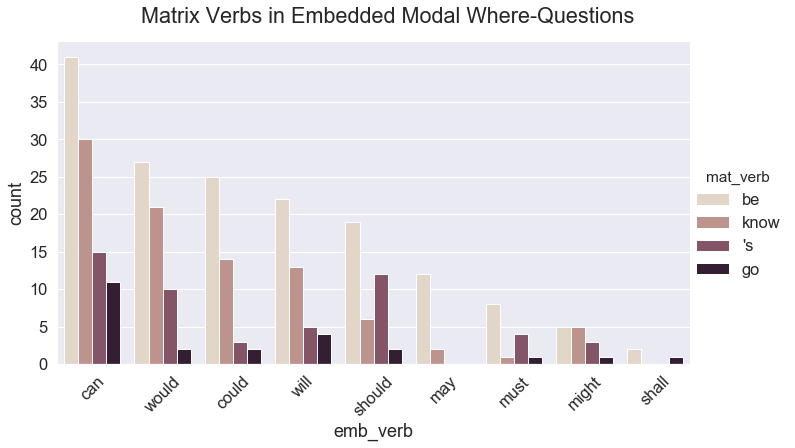

In [109]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", hue="mat_verb", kind="bar", data=m_where_vs_mv_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Matrix Verbs in Embedded Modal Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [162]:
m_where_vs_mv.loc[m_where_vs_mv.emb_verb == "shall"].sentence

384061    mum was like where shall we go? I was going to joke that we should take  to Blackpool
409842      right there we go  where shall I go?  what shall I do?                             
421043    which is where we shall go is is                                                     
Name: sentence, dtype: object

# C1. Modal-Who

In [150]:
m_who_vs_count = mod_who.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index()

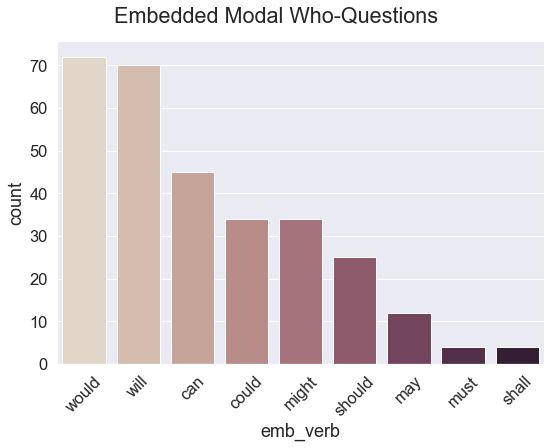

In [27]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=m_who_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Embedded Modal Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [151]:
# first filter so its not a super long list. We want to see the most mrequent ones.
m_who_v2s = mod_who.groupby('v2_after').filter(lambda x: len(x) >= 5)
m_who_vs_v2_count = m_who_v2s.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
# then look at the counts mor those most mrequent verbs
m_who_v2s.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
can       be          5 
          drive       4 
          get         2 
          go          2 
          have        1 
could     be          8 
          do          2 
          have        7 
may       be          6 
          have        2 
might     be          14
          have        9 
          want        2 
must      be          1 
          have        3 
shall     be          2 
          have        1 
should    be          4 
          get         2 
          go          2 
          have        4 
will      be          21
          do          2 
          get         1 
          have        2 
would     be          13
          do          1 
          drive       1 
          go          1 
          have        15
          want        6 
Name: v2_after, dtype: int64

,corpus,medium,sentence,clauseType,phrase,wh,questType,heuristic,v_before,v1_after,v2_after,v3_after,wh_v1,mat_verb,emb_verb


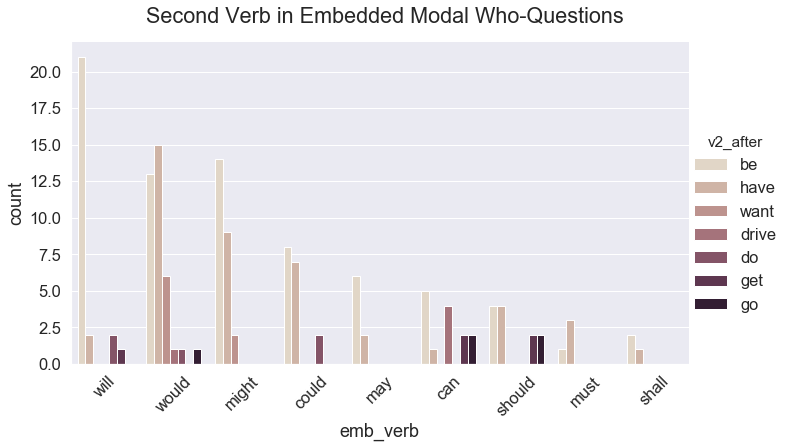

In [152]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=m_who_vs_v2_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Embedded Modal Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# mat_verb

In [153]:
m_who_vs_mv = mod_who.groupby('mat_verb').filter(lambda x: len(x) >= 10)
m_who_vs_mv_count = m_who_vs_mv.groupby(["emb_verb","mat_verb"])["mat_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)
m_who_vs_mv.groupby(['emb_verb','mat_verb'])['mat_verb'].count()

emb_verb  mat_verb
can       be          4 
          know        5 
          say         1 
          see         7 
          wonder      1 
could     be          1 
          know        5 
          say         1 
          see         1 
          wonder      2 
may       be          1 
          know        2 
          see         1 
might     be          2 
          know        11
          say         3 
          see         1 
must      know        2 
should    be          9 
          decide      4 
          know        1 
          see         1 
will      be          14
          decide      6 
          know        11
          say         1 
          see         3 
          wonder      2 
would     be          11
          know        9 
          say         5 
          see         2 
          wonder      8 
Name: mat_verb, dtype: int64

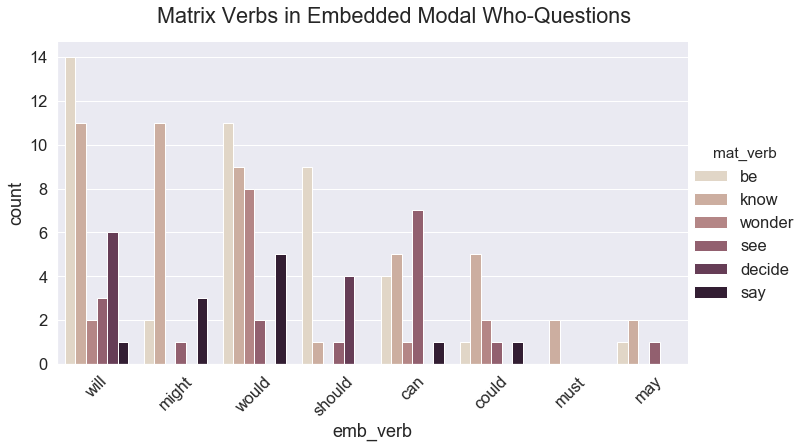

In [117]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", hue="mat_verb", kind="bar", data=m_who_vs_mv_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Matrix Verbs in Embedded Modal Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [173]:
m_who_vs_mv.loc[m_who_vs_mv.emb_verb == "can"].sentence

15037     ‘A lot of our traders, particularly the younger ones, compete to see who can wear the most outrageous clothes,’ says a spokesman, ‘There was a discussion to do it as a joke but there was not a real consensus.                                                                                                                                    
106858    This being so, who, outside the schools, can provide assistance?                                                                                                                                                                                                                                                                                    
122848    Armed with this information, talk to a lot of different lending companies and see who can offer the best deal.                                                                                                                                                                                  